In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:\\Users\\Master\\Desktop\\dataTools')
import dataTools as dt

In [2]:
raw_train = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_train.csv')
raw_test = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_test.csv')

In [3]:
raw_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
raw_train.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
features = raw_train.drop(columns='median_house_value')
target = raw_train['median_house_value']
features_Test = raw_test.drop(columns='median_house_value')
target_test = raw_test['median_house_value']

In [6]:
target.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression
initialModel = LinearRegression().fit(features, target)
initialModel.score(features, target)

0.6413378529502691

In [8]:
def rSquare( x, y, yhat ):
    if x.ndim == 1: p, n = 1, x.shape[0]
    else: p, n = x.shape[1], x.shape[0]
    r2 = 1 - np.sum( (y - yhat) ** 2) / np.sum( (y - np.mean(y)) ** 2 ) 
    adj_r2 = 1 - (1 - r2) * ( n - 1) / ( n - p - 1 )
    return {'r2': r2, 'adjr2': adj_r2}

In [9]:
yhat = initialModel.predict(features)
rSquare(features, target, yhat)

{'r2': 0.6413378529502691, 'adjr2': 0.641168981360816}

In [10]:
features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000


In [11]:
features.corr().style.background_gradient().set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.00,-0.93,-0.11,0.05,0.07,0.10,0.06,-0.02
latitude,-0.93,1.00,0.02,-0.04,-0.07,-0.11,-0.07,-0.08
housing_median_age,-0.11,0.02,1.00,-0.36,-0.32,-0.30,-0.30,-0.12
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,-0.00
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01
median_income,-0.02,-0.08,-0.12,0.20,-0.01,-0.00,0.01,1.00


In [12]:
def visualCorr(x, width=15, height=7):
    plt.figure(figsize=(width,height))
    mask = np.zeros_like(x.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='seismic')
    plt.show()

<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


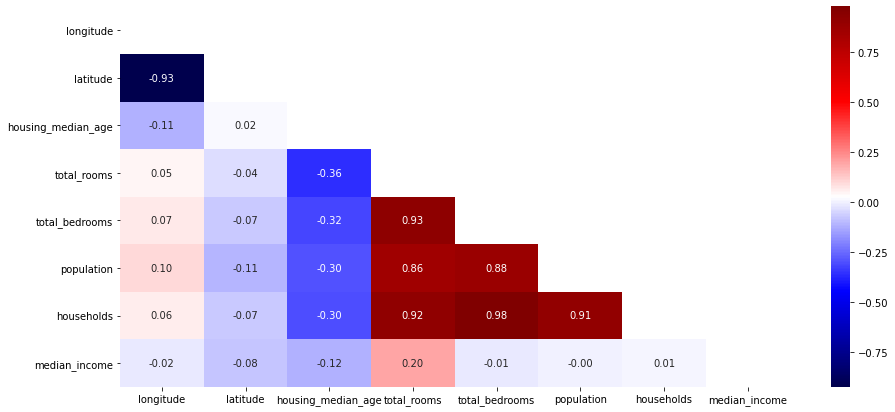

In [13]:
visualCorr(features)

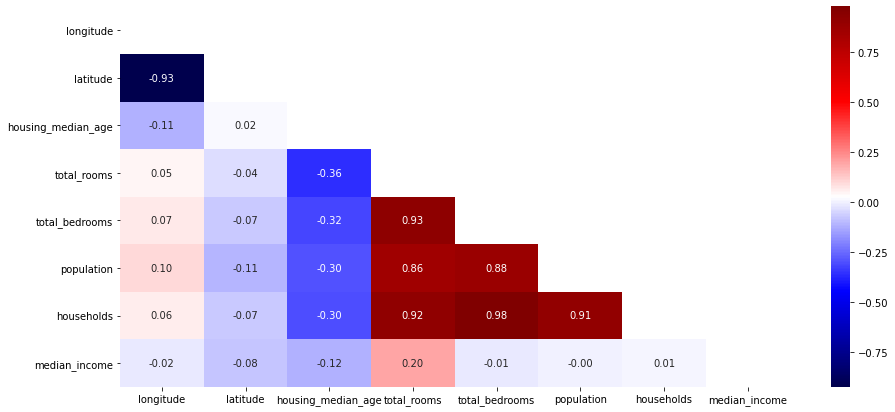

In [14]:
dt.visualCorr(features)

<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


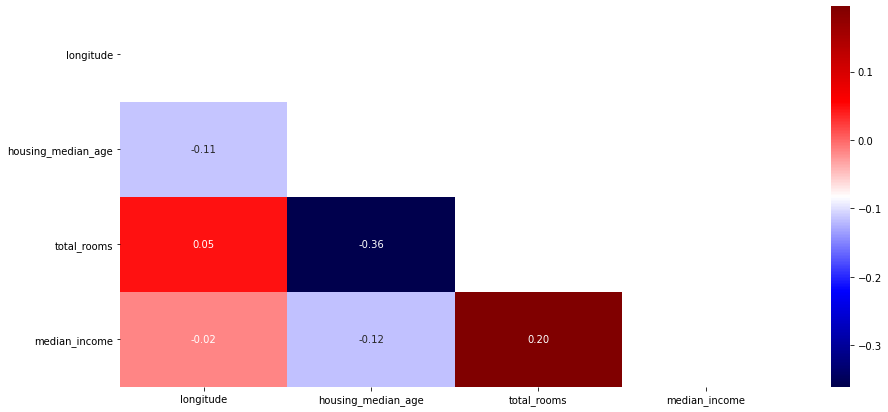

In [15]:
visualCorr(features.drop(columns=['latitude','total_bedrooms','population','households']))

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x):
    vifFrame = pd.DataFrame()
    vifFrame['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]
    vifFrame['features'] = x.columns
    return vifFrame

In [17]:
vif(features)

,vif factor,features
0,615.268673,longitude
1,549.530177,latitude
2,7.271744,housing_median_age
3,30.044820,total_rooms
4,96.656002,total_bedrooms
5,16.638519,population
6,96.284435,households
7,8.253099,median_income


In [18]:
vif(features.drop(columns=['longitude','latitude']))

,vif factor,features
0,3.574735,housing_median_age
1,27.014005,total_rooms
2,89.215256,total_bedrooms
3,15.802222,population
4,95.172568,households
5,4.805563,median_income


In [19]:
vif(features.drop(columns=['longitude','latitude','total_bedrooms','households']))

,vif factor,features
0,3.124396,housing_median_age
1,11.549540,total_rooms
2,10.325695,population
3,4.182617,median_income


In [20]:
vif(features.drop(columns=['longitude','latitude','total_bedrooms','households', 'total_rooms']))

,vif factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


In [21]:
dt.vif(features.drop(columns=['longitude','latitude','total_bedrooms','households', 'total_rooms']))

,vif factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


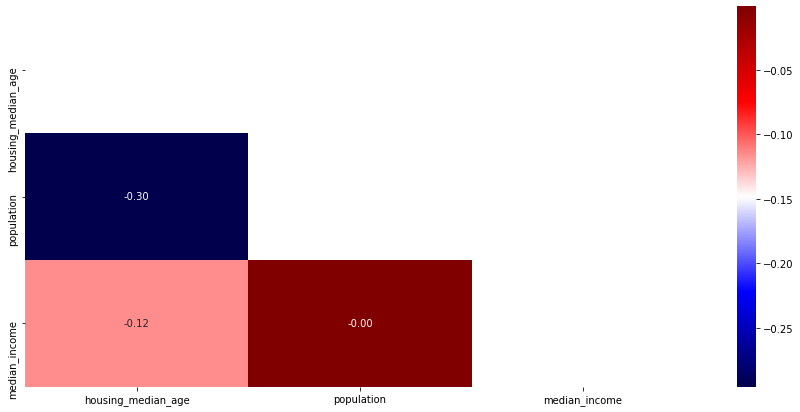

In [22]:
visualCorr(features.drop(columns=['longitude','latitude','total_bedrooms','households', 'total_rooms']))

In [23]:
multicolli_features = features.drop(columns=['longitude','latitude','total_bedrooms','households', 'total_rooms'])

In [24]:
multicolli_features

,housing_median_age,population,median_income
0,15.0,1015.0,1.4936
1,19.0,1129.0,1.8200
2,17.0,333.0,1.6509
3,14.0,515.0,3.1917
4,20.0,624.0,1.9250
...,...,...,...
16995,52.0,907.0,2.3571
16996,36.0,1194.0,2.5179
16997,17.0,1244.0,3.0313
16998,19.0,1298.0,1.9797


In [25]:
multicolliModel = LinearRegression().fit(multicolli_features, target)
yhat = multicolliModel.predict(multicolli_features)
rSquare(multicolli_features, target, yhat)

{'r2': 0.5150206852133975, 'adjr2': 0.5149350804861463}

In [26]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in features.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [27]:
def forward_selection(x, y):
    selected_columns = []
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        best_model = forward(model, features, target, selected_columns)
  
        if not i:
            before_model = best_model
        else: 
            if best_model.score > before_model.score: before_model = best_model
            else: break
        selected_columns = best_model.columns
    return before_model

In [28]:
forwardfeatures = forward_selection(features, target)
forwardfeatures

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [29]:
forwardfeatures.columns

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']

In [30]:
forwardFeatures = pd.DataFrame(features[['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']] )

In [31]:
forwardFeatures

,median_income,housing_median_age,total_bedrooms,population,total_rooms,latitude,longitude,households
0,1.4936,15.0,1283.0,1015.0,5612.0,34.19,-114.31,472.0
1,1.8200,19.0,1901.0,1129.0,7650.0,34.40,-114.47,463.0
2,1.6509,17.0,174.0,333.0,720.0,33.69,-114.56,117.0
3,3.1917,14.0,337.0,515.0,1501.0,33.64,-114.57,226.0
4,1.9250,20.0,326.0,624.0,1454.0,33.57,-114.57,262.0
...,...,...,...,...,...,...,...,...
16995,2.3571,52.0,394.0,907.0,2217.0,40.58,-124.26,369.0
16996,2.5179,36.0,528.0,1194.0,2349.0,40.69,-124.27,465.0
16997,3.0313,17.0,531.0,1244.0,2677.0,41.84,-124.30,456.0
16998,1.9797,19.0,552.0,1298.0,2672.0,41.80,-124.30,478.0


In [32]:
forwardModel = LinearRegression().fit(forwardFeatures, target)
yhat = forwardModel.predict(forwardFeatures)
rSquare(forwardFeatures, target, yhat)

{'r2': 0.6413378529502689, 'adjr2': 0.6411689813608158}

In [33]:
from itertools import combinations
def backward(model, x, y, selected_columns):
    result = []
    for combi in combinations(selected_columns, len(selected_columns)-1):
        columns = list(combi)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [34]:
def backward_elimination(x, y):
    selected_columns = x.columns
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        best_model = backward(model, features, target, selected_columns)
        if not i:
            before_model = best_model
        else:
            if best_model.score > before_model.score: before_model = best_model
            else: break
        selected_columns = best_model.columns
    return before_model

In [35]:
backwardfeatures = backward_elimination(features, target)

In [36]:
backwardfeatures

model                                     LinearRegression()
score                                               0.640579
columns    [longitude, latitude, housing_median_age, tota...
Name: 1, dtype: object

In [37]:
backwardfeatures.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'median_income']

In [38]:
backwardFeatures = pd.DataFrame(features[[
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'median_income']])

In [39]:
backwardModel = LinearRegression().fit(backwardFeatures, target)
yhat = backwardModel.predict(backwardFeatures)
rSquare(backwardfeatures, target, yhat)

{'r2': 0.6407268394704915, 'adjr2': 0.28145367894098294}

In [40]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in features.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

def backward(model, x, y, selected_columns):
    result = []
    for combi in combinations(selected_columns, len(selected_columns)-1):
        columns = list(combi)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [41]:
def stepwise_selection(x, y):
    selected_columns = []

    for i in range(x.shape[1]):
        model = LinearRegression()
        forward_model = forward(model, x, y, selected_columns)
        selected_columns = forward_model.columns

        if i < 1: before_model = forward_model; continue

        backward_model = backward(model, x, y, selected_columns)
        large_model = forward_model
        if forward_model.score < backward_model.score:
            selected_columns = backward_model.columns
            large_model = backward_model
    
        if large_model.score > before_model.score: before_model = large_model
        else: break
    return before_model

In [42]:
stepwisefeatures = stepwise_selection(features, target)
stepwisefeatures

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [43]:
stepwisefeatures.columns

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']

In [44]:
stepwiseFeatures = pd.DataFrame(features[['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']])

In [45]:
stepwiseModel = LinearRegression().fit(stepwiseFeatures, target)
yhat = stepwiseModel.predict(stepwiseFeatures)
rSquare(stepwiseFeatures, target, yhat)

{'r2': 0.6413378529502689, 'adjr2': 0.6411689813608158}

In [46]:
import eli5
from eli5.sklearn import PermutationImportance

In [47]:
model = LinearRegression().fit(features, target)

In [48]:
eli5.show_weights(model, feature_names = features.columns.tolist())

Weight?,Feature
+40507.068,median_income
+1150.695,housing_median_age
+117.649,total_bedrooms
+45.436,households
-8.378,total_rooms
-38.489,population
-42925.673,latitude
-43139.637,longitude
-3620600.893,<BIAS>


In [49]:
model = LinearRegression().fit(features, target)
perm = PermutationImportance(model, random_state=123).fit(features, target)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
1.2499 ± 0.0340,latitude
1.1162 ± 0.0222,longitude
0.8855 ± 0.0256,median_income
0.3658 ± 0.0042,total_bedrooms
0.2921 ± 0.0032,population
0.0483 ± 0.0031,total_rooms
0.0453 ± 0.0021,households
0.0310 ± 0.0017,housing_median_age


In [50]:
import shap

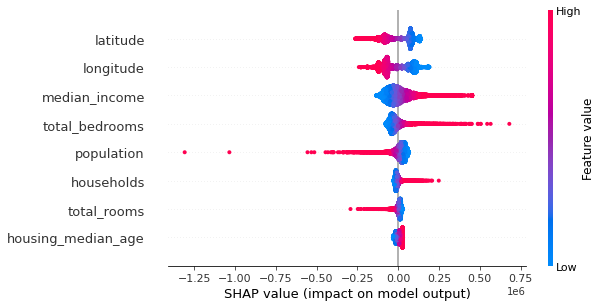

In [51]:
model = LinearRegression().fit(features, target)
explainer = shap.LinearExplainer(model, features)
shap_value = explainer.shap_values(features)
shap.summary_plot(shap_value, features)

In [52]:
from sklearn.feature_selection import RFE
model = LinearRegression().fit(features, target)
feature_selector = RFE(model, n_features_to_select=5)
feature_selector = feature_selector.fit(features, target)

In [53]:
display(feature_selector.n_features_)
display(feature_selector.support_)

5

array([ True,  True,  True, False,  True, False, False,  True])

In [137]:
features.loc[:,[True, True, True, False, True, False, False, True]]

,longitude,latitude,housing_median_age,total_bedrooms,median_income
0,-114.31,34.19,15.0,1283.0,1.4936
1,-114.47,34.40,19.0,1901.0,1.8200
2,-114.56,33.69,17.0,174.0,1.6509
3,-114.57,33.64,14.0,337.0,3.1917
4,-114.57,33.57,20.0,326.0,1.9250
...,...,...,...,...,...
16995,-124.26,40.58,52.0,394.0,2.3571
16996,-124.27,40.69,36.0,528.0,2.5179
16997,-124.30,41.84,17.0,531.0,3.0313
16998,-124.30,41.80,19.0,552.0,1.9797


In [138]:
features.loc[:, feature_selector.support_]

,longitude,latitude,housing_median_age,total_bedrooms,median_income
0,-114.31,34.19,15.0,1283.0,1.4936
1,-114.47,34.40,19.0,1901.0,1.8200
2,-114.56,33.69,17.0,174.0,1.6509
3,-114.57,33.64,14.0,337.0,3.1917
4,-114.57,33.57,20.0,326.0,1.9250
...,...,...,...,...,...
16995,-124.26,40.58,52.0,394.0,2.3571
16996,-124.27,40.69,36.0,528.0,2.5179
16997,-124.30,41.84,17.0,531.0,3.0313
16998,-124.30,41.80,19.0,552.0,1.9797


In [139]:
features_RFE = features.loc[:, feature_selector.support_]

In [140]:
features_RFE

,longitude,latitude,housing_median_age,total_bedrooms,median_income
0,-114.31,34.19,15.0,1283.0,1.4936
1,-114.47,34.40,19.0,1901.0,1.8200
2,-114.56,33.69,17.0,174.0,1.6509
3,-114.57,33.64,14.0,337.0,3.1917
4,-114.57,33.57,20.0,326.0,1.9250
...,...,...,...,...,...
16995,-124.26,40.58,52.0,394.0,2.3571
16996,-124.27,40.69,36.0,528.0,2.5179
16997,-124.30,41.84,17.0,531.0,3.0313
16998,-124.30,41.80,19.0,552.0,1.9797


In [141]:
rfeModel = LinearRegression().fit(features_RFE, target)
yhat = rfeModel.predict(features_RFE)
rSquare(features_RFE, target, yhat)

{'r2': 0.6066073944924848, 'adjr2': 0.6064916499339619}

In [143]:
from sklearn.preprocessing import StandardScaler
col = features.columns
scaler = StandardScaler()
features_scaled = features.copy()
features_scaled[col] = scaler.fit_transform(features[col])

In [144]:
features_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454
...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = features.copy()
features_scaled = scaler.fit_transform(features_scaled)

In [147]:
features_scaled

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.36118401,
        -0.07599796, -1.25254316],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.26186523,
        -0.09940441, -1.08148298],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.95535424,
        -0.99925206, -1.17010515],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.16167524,
        -0.11760942, -0.44666313],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.1146295 ,
        -0.06039367, -0.99778717],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.54326844,
        -0.60134255, -0.45536288]])

In [148]:
features_scaled = pd.DataFrame(data = features_scaled, columns=features.columns)

In [149]:
features_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454
...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787


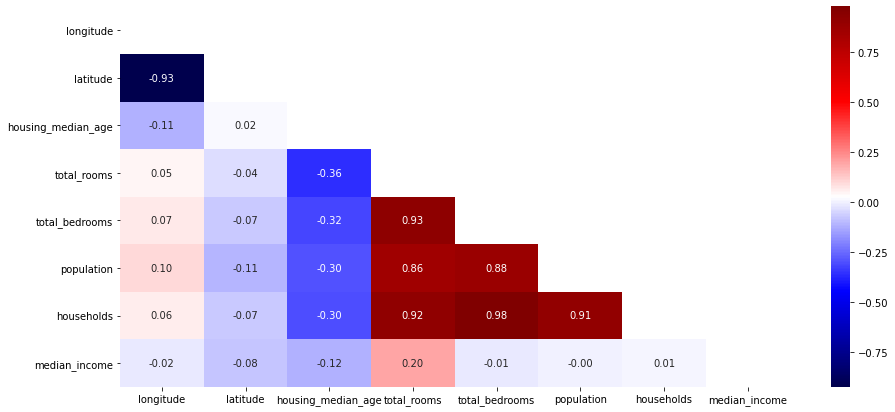

In [150]:
dt.visualCorr(features_scaled)

In [154]:
dt.vif(features_scaled.drop(columns=['households', 'total_bedrooms']))

,vif factor,features
0,8.304574,longitude
1,8.427962,latitude
2,1.260121,housing_median_age
3,4.866106,total_rooms
4,4.621648,population
5,1.323630,median_income


In [155]:
result = forward_selection(features_scaled, target)
result

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [156]:
result = stepwise_selection(features_scaled, target)
result

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [157]:
result = backward_elimination(features_scaled, target)
result

model                                     LinearRegression()
score                                               0.640579
columns    [longitude, latitude, housing_median_age, tota...
Name: 1, dtype: object

In [159]:
model = LinearRegression().fit(features_scaled, target)
perm = PermutationImportance(model, random_state=123).fit(features_scaled, target)
eli5.show_weights(perm, feature_names = features_scaled.columns.tolist())

Weight,Feature
1.2499 ± 0.0340,latitude
1.1162 ± 0.0222,longitude
0.8855 ± 0.0256,median_income
0.3658 ± 0.0042,total_bedrooms
0.2921 ± 0.0032,population
0.0483 ± 0.0031,total_rooms
0.0453 ± 0.0021,households
0.0310 ± 0.0017,housing_median_age


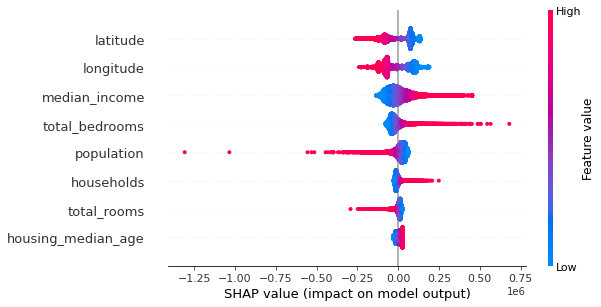

In [160]:
model = LinearRegression().fit(features_scaled, target)
explainer = shap.LinearExplainer(model, features_scaled)
shap_value = explainer.shap_values(features_scaled)
shap.summary_plot(shap_value, features_scaled)

In [161]:
from sklearn.feature_selection import RFE
model = LinearRegression().fit(features_scaled, target)
features_selector = RFE(model, n_features_to_select=5)
features_selector = features_selector.fit(features_scaled, target)

In [162]:
features_selector.n_features_

5

In [163]:
features_selector.support_

array([ True,  True, False, False,  True,  True, False,  True])

In [164]:
features_scaled.loc[:, features_selector.support_]

,longitude,latitude,total_bedrooms,population,median_income
0,2.619365,-0.671520,1.764204,-0.361184,-1.252543
1,2.539569,-0.573264,3.230441,-0.261865,-1.081483
2,2.494683,-0.905463,-0.866956,-0.955354,-1.170105
3,2.489696,-0.928857,-0.480230,-0.796793,-0.362600
4,2.489696,-0.961609,-0.506328,-0.701830,-1.026454
...,...,...,...,...,...
16995,-2.342963,2.318265,-0.344995,-0.455275,-0.799999
16996,-2.347950,2.369733,-0.027073,-0.205236,-0.715727
16997,-2.362912,2.907801,-0.019955,-0.161675,-0.446663
16998,-2.362912,2.889085,0.029868,-0.114630,-0.997787


In [165]:
np.random.seed(1234)
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x) + (np.random.randn(1000)/5)
x_train = np.linspace(0, 1, 11)
y_train = np.sin(2 * np.pi * x_train) + (np.random.randn(11)/5)
x_test = np.linspace(0, 1, 50)
y_test = np.sin(2 * np.pi * x_test) + (np.random.randn(50)/5)

In [166]:
x_poly = np.c_[ 

 x, x ** 2, x ** 3, x ** 4, x ** 5, x ** 6, x ** 7, 

 x ** 8, x ** 9, x**10

]

x_train_poly = np.c_[ 

  x_train, x_train ** 2, x_train ** 3, x_train ** 4, x_train ** 5, 

  x_train ** 6, x_train ** 7, x_train ** 8, x_train ** 9, x_train**10

]

x_test_poly = np.c_[ 

  x_test, x_test ** 2, x_test ** 3, x_test ** 4, x_test ** 5, 

  x_test ** 6, x_test ** 7, x_test ** 8, x_test ** 9, x_test**10

]

In [167]:
polyModel = LinearRegression().fit(x_train_poly, y_train)

In [168]:
polyModel.coef_

array([-4.51737913e+02,  1.21492329e+04, -1.27978862e+05,  7.19821219e+05,
       -2.42305783e+06,  5.12030330e+06, -6.85145473e+06,  5.63608286e+06,
       -2.60030935e+06,  5.14896384e+05])

In [191]:
pd.DataFrame(data = polyModel.coef_).T.style.set_precision(2)

,0,1,2,3,4,5,6,7,8,9
0,-451.74,12149.23,-127978.86,719821.22,-2423057.83,5120303.30,-6851454.73,5636082.86,-2600309.35,514896.38


In [192]:
def coef(model, x):
    tmp = []
    for coef in model.coef_:
        tmp.append('{:0.02f}'.format(coef))
  
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    
    coef_ = pd.DataFrame( tmp, columns=['coef'] )
    col = pd.DataFrame( x.columns, columns=['columns'] )
    return pd.concat( [coef_, col], axis=1)

In [194]:
coef(polyModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-451.74,12149.23,-127978.86,719821.22,-2423057.83,5120303.30,-6851454.73,5636082.86,-2600309.35,514896.38
columns,0,1,2,3,4,5,6,7,8,9


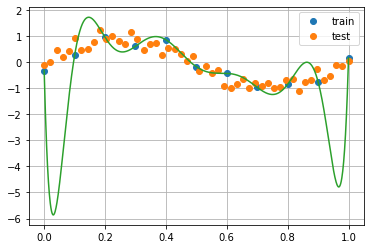

In [195]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, polyModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [196]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [197]:
ridgeModel = Ridge(alpha=0).fit(x_train_poly, y_train)

In [198]:
dt.coef(ridgeModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-461.86,12422.09,-130906.19,736592.93,-2480480.37,5243520.06,-7018597.32,5775236.42,-2665183.66,527858.39
columns,0,1,2,3,4,5,6,7,8,9


In [199]:
ridgeModel = Ridge(alpha=1000).fit(x_train_poly, y_train)

In [200]:
dt.coef(ridgeModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
columns,0,1,2,3,4,5,6,7,8,9


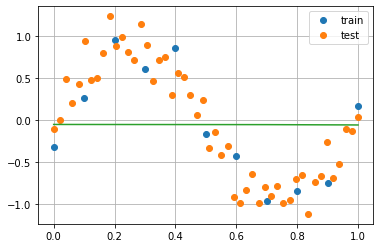

In [201]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, ridgeModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [221]:
ridgeModel = Ridge(alpha=0.0001).fit(x_train_poly, y_train)

In [222]:
dt.coef(ridgeModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,8.72,-15.74,-4.76,4.97,6.86,4.17,0.51,-1.94,-2.21,-0.11
columns,0,1,2,3,4,5,6,7,8,9


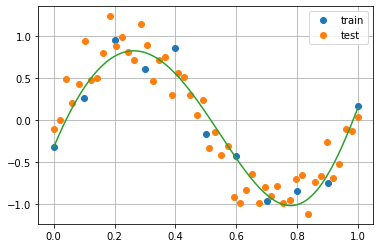

In [223]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, ridgeModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [279]:
lassoModel = Lasso(alpha=0.00001).fit(x_train_poly, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1351197928047869, tolerance: 0.0004625291485534251


In [280]:
dt.coef(lassoModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,9.47,-20.09,1.93,5.05,3.72,1.87,0.48,-0.23,-0.75,-0.95
columns,0,1,2,3,4,5,6,7,8,9


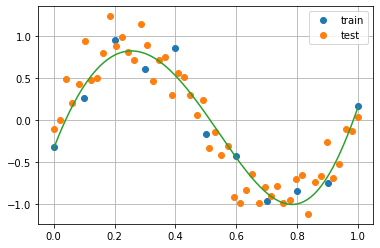

In [281]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, lassoModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()

In [284]:
elasticModel = ElasticNet(l1_ratio=0.5, alpha=0.0001, max_iter=1000000).fit(x_train_poly, y_train)

In [285]:
dt.coef(elasticModel, x_train_poly).T

,0,1,2,3,4,5,6,7,8,9
coef,7.15,-12.08,-4.13,1.43,4.48,4.29,2.43,0.00,-0.51,-2.65
columns,0,1,2,3,4,5,6,7,8,9


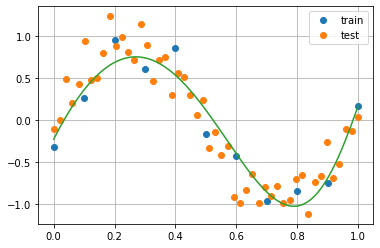

In [286]:
plt.plot(x_train, y_train, 'o', label='train')
plt.plot(x_test, y_test, 'o', label='test')
plt.plot(x, elasticModel.predict(x_poly))
plt.legend()
plt.grid()
plt.show()